In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from kernel_regression import KernelRegression as MyKernelRegression

(100,) (20, 100)
(20, 100)
(1, 100) (20, 100)


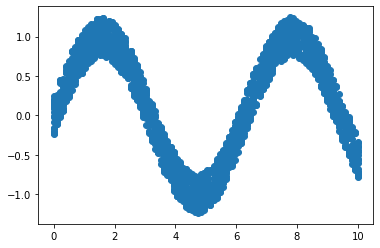

In [3]:
X     = np.linspace(0,10,100)
means = np.sin(X).ravel()

###############################################################################
# Add noise to targets
np.random.seed(1)
noise = 0.5 * (0.5 - np.random.rand(20,means.size))
print(means.shape, noise.shape)
data  = means+noise
print(data.shape)

###############################################################################
y     = data
plt.scatter(np.tile(X, len(y)),y)
X     = X[np.newaxis,:]
print(X.shape, y.shape)

In [24]:
# """The :mod:`sklearn.kernel_regressor` module implements the Kernel Regressor.
# """
# # Author: Jan Hendrik Metzen <janmetzen@mailbox.de>
# #
# # License: BSD 3 clause
# #
# # modifications by Vanessa Boehm <vboehm@berkeley.edu>
# # all modification all marked

# import numpy as np

# from sklearn.metrics.pairwise import pairwise_kernels
# from sklearn.base import BaseEstimator, RegressorMixin


# class MyKernelRegression(BaseEstimator, RegressorMixin):
#     """Nadaraya-Watson kernel regression with automatic bandwidth selection.

#     This implements Nadaraya-Watson kernel regression with (optional) automatic
#     bandwith selection of the kernel via leave-one-out cross-validation. Kernel
#     regression is a simple non-parametric kernelized technique for learning
#     a non-linear relationship between input variable(s) and a target variable.

#     Parameters
#     ----------
#     kernel : string or callable, default="rbf"
#         Kernel map to be approximated. A callable should accept two arguments
#         and the keyword arguments passed to this object as kernel_params, and
#         should return a floating point number.

#     gamma : float, default=None
#         Gamma parameter for the RBF ("bandwidth"), polynomial,
#         exponential chi2 and sigmoid kernels. Interpretation of the default
#         value is left to the kernel; see the documentation for
#         sklearn.metrics.pairwise. Ignored by other kernels. If a sequence of
#         values is given, one of these values is selected which minimizes
#         the mean-squared-error of leave-one-out cross-validation.

#     See also
#     --------

#     sklearn.metrics.pairwise.kernel_metrics : List of built-in kernels.
#     """

#     def __init__(self, kernel="rbf", gamma=None):
#         self.kernel = kernel
#         self.gamma = gamma

#     def fit(self, X, y):
#         """Fit the model

#         Parameters
#         ----------
#         X : array-like of shape = [1, n_features]
#             The training input samples.

#         mod: allow to have n_samples at the same X values
#         y : array-like, shape = [n_samples, n_features]
#             The target values

#         Returns
#         -------
#         self : object
#             Returns self.
#         """
#         self.X = np.transpose(X)
#         self.y = y

#         if hasattr(self.gamma, "__iter__"):
#             self.gamma = self._optimize_gamma(self.gamma)

#         return self

#     def predict(self, X):
#         """Predict target values for X.

#         Parameters
#         ----------
#         X : array-like of shape = [n_features,1]
#             The input samples.

#         Returns
#         -------
#         y : array of shape = [n_samples]
#             The predicted target value.
#         """
#         X = np.transpose(X)
#         K = pairwise_kernels(self.X, X, metric=self.kernel, gamma=self.gamma)
#         # mod: introduced einsum, changed axis = 0 to axis=(0,1), corrected normalization
#         Ky = np.einsum('ji,nj->nji',K,self.y, optimize=True)
#         return (Ky).sum(axis=(0,1)) / K.sum(axis=0)[np.newaxis,:]/len(self.y)

#     def _optimize_gamma(self, gamma_values):
#         # Select specific value of gamma from the range of given gamma_values
#         # by minimizing mean-squared error in leave-one-out cross validation
#         mse = np.empty_like(gamma_values, dtype=np.float)
#         for i, gamma in enumerate(gamma_values):
#             K = pairwise_kernels(self.X, self.X, metric=self.kernel,gamma=gamma)
#             np.fill_diagonal(K, 0)  # leave-one-out
#             # mod: introduced einsum, changed axis = 0 to axis=(0,1), corrected normalization
#             Ky = np.einsum('ji,nj->nji',K,self.y)
#             y_pred = Ky.sum(axis=(0,1)) / K.sum(axis=0)[np.newaxis,:]/len(self.y)
#             mse[i] = ((y_pred - self.y) ** 2).mean()

#         return gamma_values[np.nanargmin(mse)]


In [4]:
kde =MyKernelRegression("rbf", gamma=np.logspace(-2, 2, 100))
kde.fit(X,y)

KernelRegression(gamma=39.4420605943766, kernel='rbf')

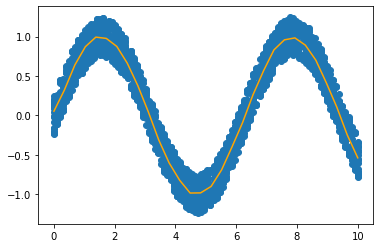

In [5]:
plt.scatter(np.tile(X, len(y)),y)
plt.plot(np.linspace(0,10,30),kde.predict(np.linspace(0,10,30)[np.newaxis,:])[0],color='orange')
plt.show()

In [10]:
### old method - needs reshapring with N datasets which makes everything slower and memory inefficient

In [11]:
"""The :mod:`sklearn.kernel_regressor` module implements the Kernel Regressor.
"""
# Author: Jan Hendrik Metzen <janmetzen@mailbox.de>
#
# License: BSD 3 clause

import numpy as np

from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.base import BaseEstimator, RegressorMixin


class KernelRegression(BaseEstimator, RegressorMixin):
    """Nadaraya-Watson kernel regression with automatic bandwidth selection.

    This implements Nadaraya-Watson kernel regression with (optional) automatic
    bandwith selection of the kernel via leave-one-out cross-validation. Kernel
    regression is a simple non-parametric kernelized technique for learning
    a non-linear relationship between input variable(s) and a target variable.

    Parameters
    ----------
    kernel : string or callable, default="rbf"
        Kernel map to be approximated. A callable should accept two arguments
        and the keyword arguments passed to this object as kernel_params, and
        should return a floating point number.

    gamma : float, default=None
        Gamma parameter for the RBF ("bandwidth"), polynomial,
        exponential chi2 and sigmoid kernels. Interpretation of the default
        value is left to the kernel; see the documentation for
        sklearn.metrics.pairwise. Ignored by other kernels. If a sequence of
        values is given, one of these values is selected which minimizes
        the mean-squared-error of leave-one-out cross-validation.

    See also
    --------

    sklearn.metrics.pairwise.kernel_metrics : List of built-in kernels.
    """

    def __init__(self, kernel="rbf", gamma=None):
        self.kernel = kernel
        self.gamma = gamma

    def fit(self, X, y):
        """Fit the model

        Parameters
        ----------
        X : array-like of shape = [n_samples, n_features]
            The training input samples.

        y : array-like, shape = [n_samples]
            The target values

        Returns
        -------
        self : object
            Returns self.
        """
        self.X = X
        self.y = y

        if hasattr(self.gamma, "__iter__"):
            self.gamma = self._optimize_gamma(self.gamma)

        return self

    def predict(self, X):
        """Predict target values for X.

        Parameters
        ----------
        X : array-like of shape = [n_samples, n_features]
            The input samples.

        Returns
        -------
        y : array of shape = [n_samples]
            The predicted target value.
        """
        K = pairwise_kernels(self.X, X, metric=self.kernel, gamma=self.gamma)
        return (K * self.y[:, None]).sum(axis=0) / K.sum(axis=0)

    def _optimize_gamma(self, gamma_values):
        # Select specific value of gamma from the range of given gamma_values
        # by minimizing mean-squared error in leave-one-out cross validation
        mse = np.empty_like(gamma_values, dtype=np.float)
        for i, gamma in enumerate(gamma_values):
            K = pairwise_kernels(self.X, self.X, metric=self.kernel,
                                 gamma=gamma)
            np.fill_diagonal(K, 0)  # leave-one-out
            Ky = K * self.y[:, np.newaxis]
            y_pred = Ky.sum(axis=0) / K.sum(axis=0)
            mse[i] = ((y_pred - self.y) ** 2).mean()

        return gamma_values[np.nanargmin(mse)]


In [12]:
X = np.tile(X, len(y))
y = y.reshape(X.shape)
kde =KernelRegression("rbf", gamma=np.logspace(-2, 2, 100))
kde.fit(X.T,np.squeeze(y))

KernelRegression(gamma=35.938136638046295, kernel='rbf')

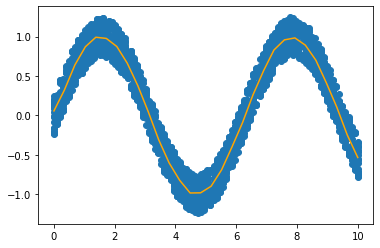

In [13]:
plt.scatter(np.tile(X, len(y)),y)
plt.plot(np.linspace(0,10,30),kde.predict(np.linspace(0,10,30)[:,np.newaxis]), color='orange')
plt.show()